In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("power plant.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
df.shape

(908, 25)

The dataset had 908 rows and 25 columns.

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

The dataset has 908 rows and 25 columns.

The dataset has data types of object and float.

The columns country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,source and url has 908 non-null values.All the other columns has null values.

The columns other_fuel3,wepp_id and estimated_generation_gwh has 0 non-null values.All the values are null in these columns.

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Object data type - country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source.

Float data type - capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh.  

In [7]:
#Checking which one is most frequently occuring in other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source.
print(df['other_fuel1'].mode())
print(df['other_fuel2'].mode())
print(df['owner'].mode())
print(df['geolocation_source'].mode())
print(df['generation_data_source'].mode())

0    Oil
dtype: object
0    Oil
dtype: object
0                      Acc Acc ltd
1                    Jk Cement ltd
2    Sterling Agro Industries ltd.
dtype: object
0    WRI
dtype: object
0    Central Electricity Authority
dtype: object


In [8]:
#Replacing the null values in other_fuel1,other_fuel2,owner,geolocayion_source using mode.
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['other_fuel2']=df['other_fuel2'].fillna(df['other_fuel2'].mode()[0])
df['owner']=df['owner'].fillna(df['owner'].mode()[0])
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [9]:
#Replacing the null values using mean.
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

In [10]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 908
commissioning_year          380
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [11]:
#Removing unwanted columns
df=df.drop(['country','latitude','longitude','other_fuel3','commissioning_year','wepp_id','estimated_generation_gwh','year_of_capacity_data','generation_data_source'],axis=1)
df.head()

,country_long,name,gppd_idnr,capacity_mw,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,India,ACME Solar Tower,WRI1020239,2.5,Solar,Oil,Oil,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,Oil,Oil,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,Oil,Oil,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,India,AGARTALA GT,IND0000001,135.0,Gas,Oil,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,India,AKALTARA TPP,IND0000002,1800.0,Coal,Oil,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [12]:
df.shape

(908, 16)

After removing unwanted columns the data set has 908 rows and 16 columns.

<AxesSubplot:>

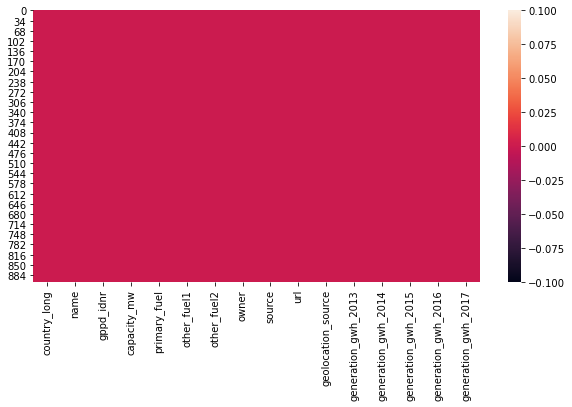

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

No null value present in the data set.

In [14]:
df.describe()

,capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


All the columns count is 908.

There is huge difference between the Min and 25th percentile in generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016 and generation_gwh_2017.

The mean is greater than median in capacity_mw.

There is huge difference between 75th percentile and Max in capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016 and generation_gwh_2017.

So outliers will be present.

In [15]:
df.corr()

,capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.667842,0.705434,0.722081,0.752829,0.767040
generation_gwh_2013,0.667842,1.000000,0.963454,0.896376,0.873542,0.830639
generation_gwh_2014,0.705434,0.963454,1.000000,0.953712,0.926010,0.891872
generation_gwh_2015,0.722081,0.896376,0.953712,1.000000,0.968969,0.928459
generation_gwh_2016,0.752829,0.873542,0.926010,0.968969,1.000000,0.964786
generation_gwh_2017,0.767040,0.830639,0.891872,0.928459,0.964786,1.000000


<AxesSubplot:>

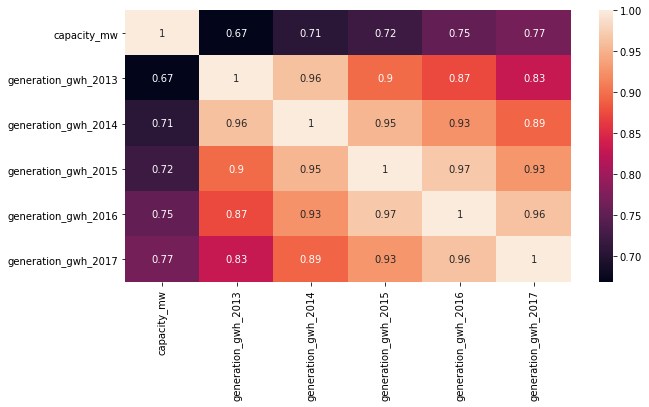

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

The capacity_mw is positively correlated to generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016 and generation_gwh_2017.

generation_gwh_2013 and generation_gwh_2014 is highly correlated to each other.

generation_gwh_2015 and generation_gwh_2014 is highly correlated to each other.

generation_gwh_2016 and generation_gwh_2015 is highly correlated to each other.

generation_gwh_2017 and generation_gwh_2016 is highly correlated to each other.

In [17]:
df.head()

,country_long,name,gppd_idnr,capacity_mw,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,India,ACME Solar Tower,WRI1020239,2.5,Solar,Oil,Oil,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,Oil,Oil,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,Oil,Oil,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,India,AGARTALA GT,IND0000001,135.0,Gas,Oil,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,India,AKALTARA TPP,IND0000002,1800.0,Coal,Oil,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


Data Visualization

In [18]:
#Seperating thr categorical and numerical colimns
cat=df[['country_long','name','gppd_idnr','primary_fuel','other_fuel1','other_fuel2','owner','source','url','geolocation_source']]
con=df[['capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

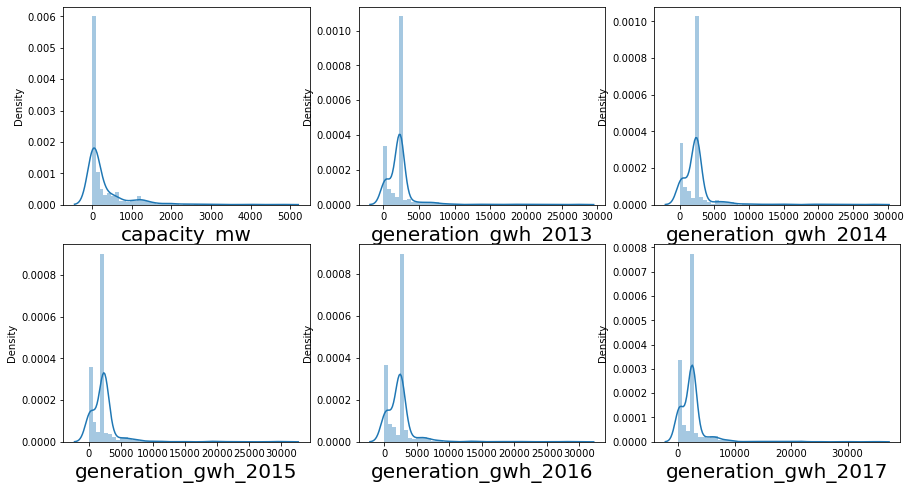

In [19]:
plt.figure(figsize=(15,8))
plotnumber=1

for i in con:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(con[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [20]:
#Checking skewness
df.skew()

capacity_mw            3.193257
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

Skewness is present, need to remove skewness.

In [21]:
#Removing Skewness
df['capacity_mw']=np.sqrt(df['capacity_mw'])
df['generation_gwh_2013']=np.sqrt(df['generation_gwh_2013'])
df['generation_gwh_2014']=np.sqrt(df['generation_gwh_2014'])
df['generation_gwh_2015']=np.sqrt(df['generation_gwh_2015'])
df['generation_gwh_2016']=np.sqrt(df['generation_gwh_2016'])
df['generation_gwh_2017']=np.sqrt(df['generation_gwh_2017'])

In [22]:
df.skew()

capacity_mw            1.474543
generation_gwh_2013    1.037355
generation_gwh_2014    0.988517
generation_gwh_2015    1.057697
generation_gwh_2016    0.982545
generation_gwh_2017    0.901027
dtype: float64

Skewness is looking good enough.

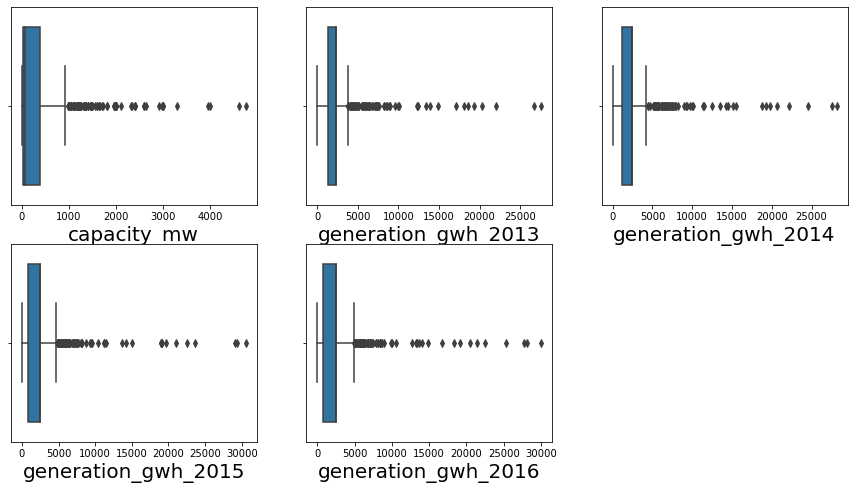

In [23]:
#Checking outliers
plt.figure(figsize=(15,8))
plotnumber=1

for i in con:
    if plotnumber<=5:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(con[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

Outliers are present in capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016 and generation_gwh_2017.

In [24]:
cat.head()

,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source
0,India,ACME Solar Tower,WRI1020239,Solar,Oil,Oil,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,India,ADITYA CEMENT WORKS,WRI1019881,Coal,Oil,Oil,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,India,AES Saurashtra Windfarms,WRI1026669,Wind,Oil,Oil,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,India,AGARTALA GT,IND0000001,Gas,Oil,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,India,AKALTARA TPP,IND0000002,Coal,Oil,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI


Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

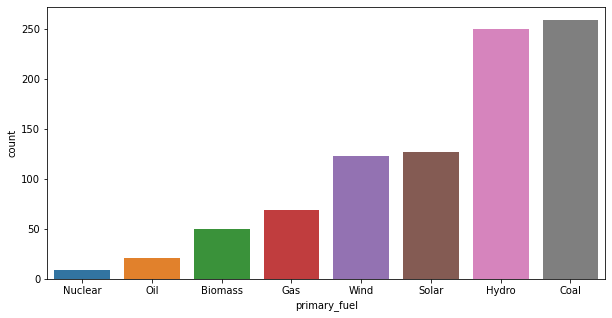

In [25]:
plt.figure(figsize=(10,5))
sns.countplot('primary_fuel',data=df,order=(df['primary_fuel'].value_counts().sort_values().index))
df['primary_fuel'].value_counts()

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

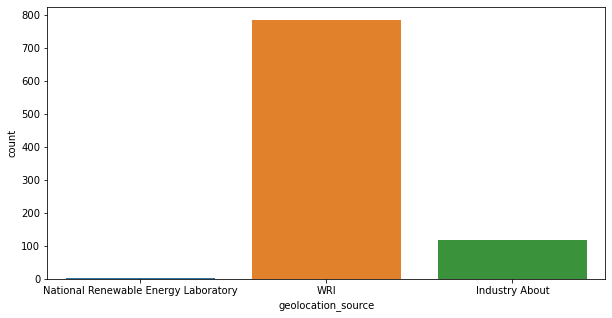

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['geolocation_source'])
df['geolocation_source'].value_counts()

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

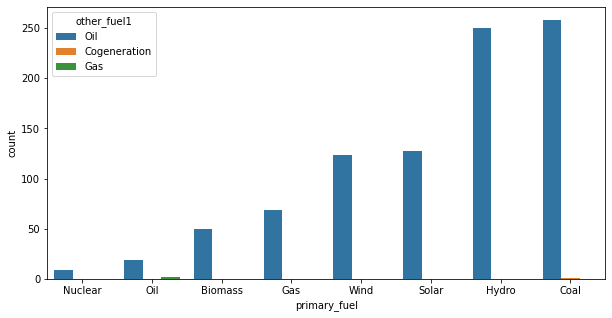

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='primary_fuel',hue='other_fuel1',data=df,order=(df['primary_fuel'].value_counts().sort_values().index))

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

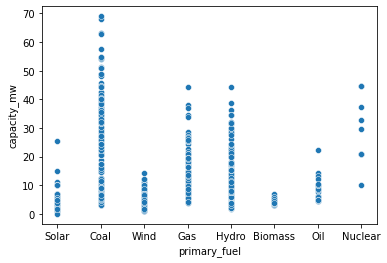

In [28]:
sns.scatterplot('primary_fuel','capacity_mw',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

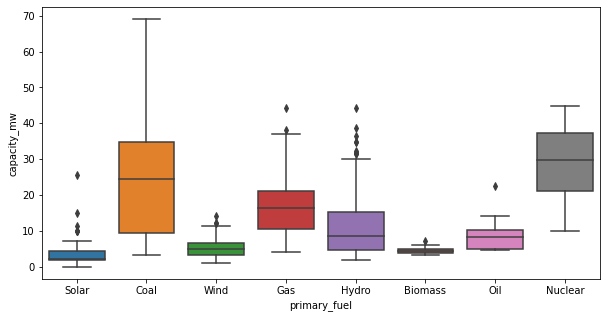

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='primary_fuel',y='capacity_mw',data=df)

The capacity of Solar ranging from 0 to 25.

The capacity of Coal ranging from 2 to 70.

The capacity of Wind ranging from 0 to 15.

The capacity of Gas ranging from 0 to 45.

The capacity of Hydro ranging from 0 to 45.

The capacity of Biomass ranging from 0 to 9.

The capacity of oil ranging from 2 to 22.

The capacity of Nuclear ranging from 10 to 40.

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='generation_gwh_2014'>

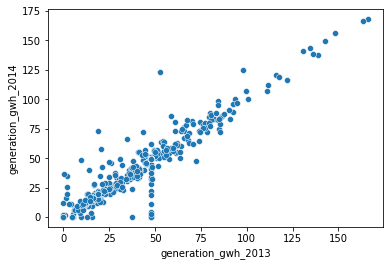

In [30]:
sns.scatterplot('generation_gwh_2013','generation_gwh_2014',data=df)

generation_gwh_2013 and generation_gwh_2014 is positively correlated.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2015'>

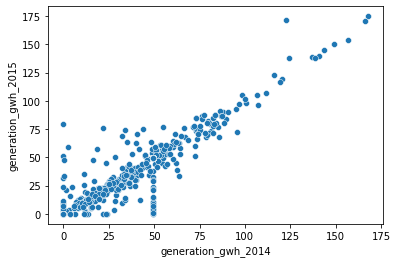

In [31]:
sns.scatterplot('generation_gwh_2014','generation_gwh_2015',data=df)

generation_gwh_2014 and generation_gwh_2015 is positively correlated

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='generation_gwh_2016'>

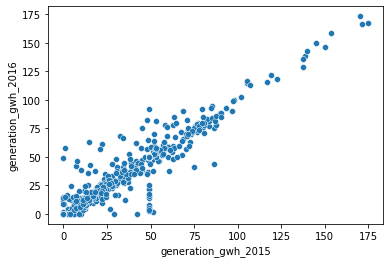

In [32]:
sns.scatterplot('generation_gwh_2015','generation_gwh_2016',data=df)

generation_gwh_2015 and generation_gwh_2016 is positively correlated.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='generation_gwh_2017'>

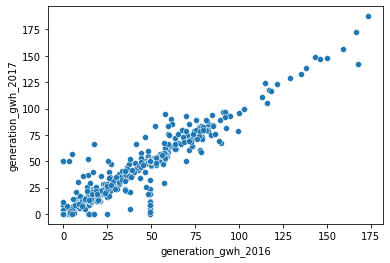

In [33]:
sns.scatterplot('generation_gwh_2016','generation_gwh_2017',data=df)

generation_gwh_2016 and generation_gwh_2017 is positively correlated.

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='generation_gwh_2017'>

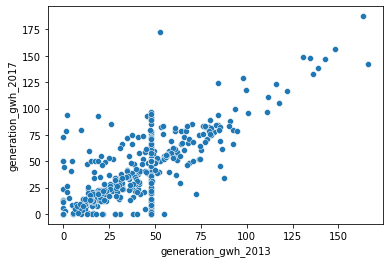

In [34]:
sns.scatterplot('generation_gwh_2013','generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

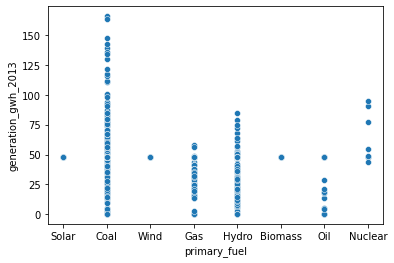

In [35]:
sns.scatterplot('primary_fuel','generation_gwh_2013',data=df)

Coal electricity generation in gigawatt-hours  ranging from 0 to 175.

Gas electricity generation in gigawatt-hours  ranging from 0 to 50.

Hydro electricity generation in gigawatt-hours  ranging from 0 to 80.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

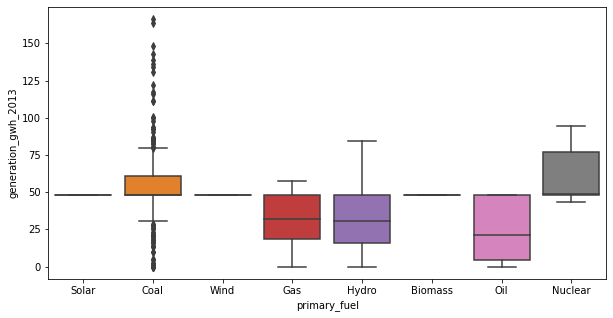

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='primary_fuel',y='generation_gwh_2013',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

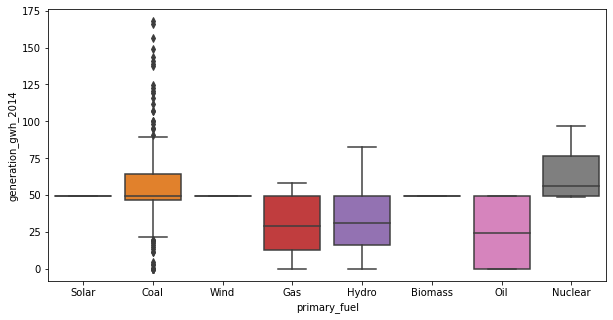

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

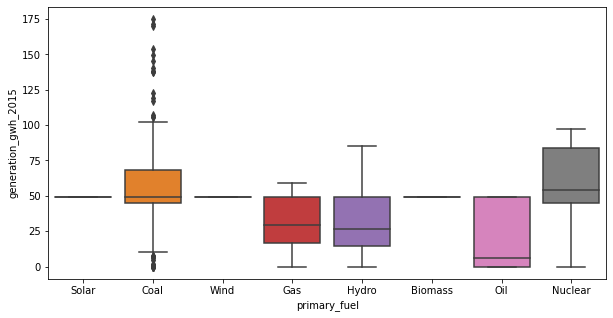

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

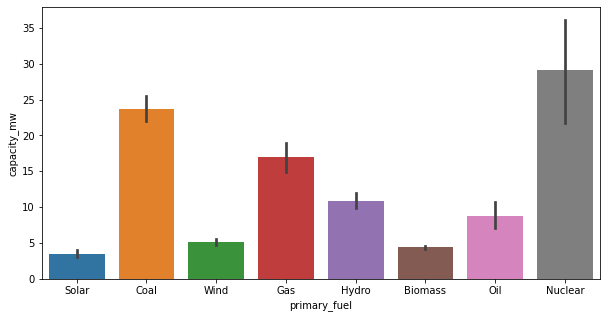

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x='primary_fuel',y='capacity_mw',data=df)

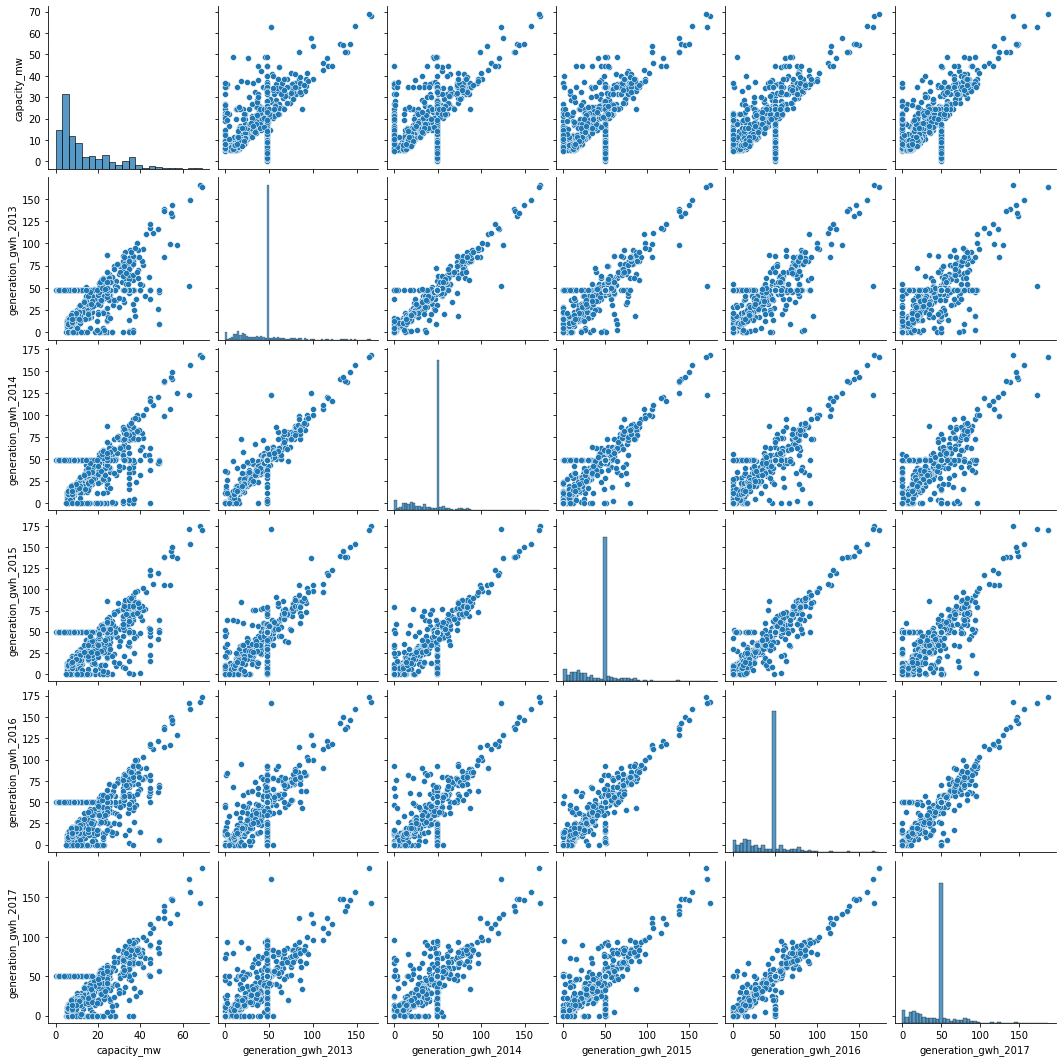

In [40]:
sns.pairplot(df)

In [41]:
#Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
for i in df:
    if df[i].dtypes=='object':
        df[i]=Le.fit_transform(df[i])

In [42]:
df.head()

,country_long,name,gppd_idnr,capacity_mw,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,0,658,1.581139,6,2,0,229,109,128,1,48.000617,49.197493,49.133210,49.537221,50.316543
1,0,1,520,9.899495,1,2,0,258,174,173,2,48.000617,49.197493,49.133210,49.537221,50.316543
2,0,2,854,6.260990,7,2,0,2,21,205,2,48.000617,49.197493,49.133210,49.537221,50.316543
3,0,3,0,11.618950,2,2,0,5,22,58,2,25.135193,24.855367,29.047323,29.765827,25.763822
4,0,4,1,42.426407,1,2,0,5,22,58,2,40.844706,55.095826,76.917943,79.012657,73.386509


In [43]:
#country_long,name,gppd_idnr,other_fuel2 and url is not needed ,so removing
df=df.drop(['country_long','name','gppd_idnr','other_fuel2','url'],axis=1)
df.head()

,capacity_mw,primary_fuel,other_fuel1,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.581139,6,2,229,109,1,48.000617,49.197493,49.133210,49.537221,50.316543
1,9.899495,1,2,258,174,2,48.000617,49.197493,49.133210,49.537221,50.316543
2,6.260990,7,2,2,21,2,48.000617,49.197493,49.133210,49.537221,50.316543
3,11.618950,2,2,5,22,2,25.135193,24.855367,29.047323,29.765827,25.763822
4,42.426407,1,2,5,22,2,40.844706,55.095826,76.917943,79.012657,73.386509


<AxesSubplot:>

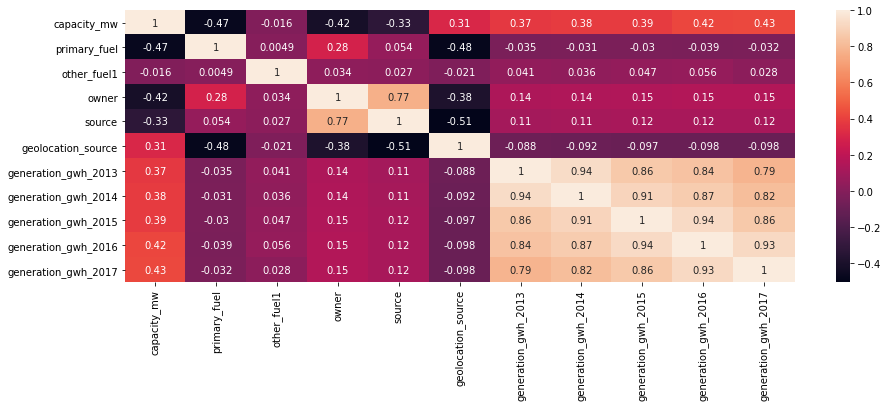

In [44]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

The primary_fuel is positively correlated to other_fuel1,owner and source. primary_fuel negatively correlated to capacity_mw,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016 and generation_gwh_2017.

The capacity_mw is positively correlated to geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016 and generation_gwh_2017.


In [45]:
#Finding outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  72,  81, 144, 144, 144, 159, 192, 210, 210, 300,
       309, 309, 309, 309, 309, 322, 346, 365, 365, 365, 365, 365, 365,
       494, 494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 649,
       649, 649, 649, 649, 649, 658, 658, 658, 658, 658, 658, 662, 670,
       690, 696, 696, 696, 696, 696, 722, 722, 722, 722, 725, 725, 725,
       725, 725, 727, 727, 727, 727, 727, 727, 787, 787, 787, 787, 787,
       787, 809, 809, 809, 809, 809, 812, 814, 818, 833, 871, 872, 880,
       881, 881, 881, 881, 881, 881, 896, 901], dtype=int64), array([ 0,  9, 10,  4,  4,  0,  9, 10,  6,  4,  6,  7,  4,  6,  7,  8,  9,
       10,  4,  4,  0,  6,  7,  8,  9, 10,  0,  6,  7,  8,  9, 10,  0,  6,
        7,  8,  9, 10,  0,  6,  7,  8,  9, 10,  0,  6,  7,  8,  9, 10,  4,
        4,  4,  0,  7,  8,  9, 10,  6,  7,  8,  9,  6,  7,  8,  9, 10,  0,
        6,  7,  8,  9, 10,  0,  6,  7,  8,  9, 10,  0,  7,  8,  9, 10,  2,
        2,  2,  4,  4,  4,  4,  0,  6,  7,  8,  9, 10,  4,

In [46]:
#Removing the outliers
dfnew=df[(z<3).all(axis=1)]
print('dfnew.shape = ',dfnew.shape)
df=dfnew

dfnew.shape =  (873, 11)


In [47]:
dataloss=((908-873)/908)*100
dataloss

3.854625550660793

3.85% Data loss after oulier removal.

Primary fuel prediction

In [48]:
# Separating dependent and independent variables

X=df.drop('primary_fuel',axis=1)
Y=df['primary_fuel']
print(X.shape)
print(Y.shape)

(873, 10)
(873,)


In [50]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

,VIF,Features
0,1.541942,capacity_mw
1,22.341552,other_fuel1
2,2.591738,owner
3,2.570787,source
4,1.477289,geolocation_source
5,6.464953,generation_gwh_2013
6,8.275824,generation_gwh_2014
7,7.690469,generation_gwh_2015
8,10.396456,generation_gwh_2016
9,5.566797,generation_gwh_2017


Multicollinearity in other_fuel1 and generation_gwh_2016.

In [51]:
#Dropping generation_gwh_2016.
X=X.drop(['generation_gwh_2016'],axis=1)
X.head()

,capacity_mw,other_fuel1,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017
0,1.581139,2,229,109,1,48.000617,49.197493,49.133210,50.316543
1,9.899495,2,258,174,2,48.000617,49.197493,49.133210,50.316543
2,6.260990,2,2,21,2,48.000617,49.197493,49.133210,50.316543
3,11.618950,2,5,22,2,25.135193,24.855367,29.047323,25.763822
4,42.426407,2,5,22,2,40.844706,55.095826,76.917943,73.386509


In [52]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_scale=scale.fit_transform(X)
X_scale

array([[-0.96419275,  0.        ,  2.22202848, ...,  0.37239676,
         0.39015045,  0.38367775],
       [-0.21533146,  0.        ,  2.58947828, ...,  0.37239676,
         0.39015045,  0.38367775],
       [-0.5428884 ,  0.        , -0.65421653, ...,  0.37239676,
         0.39015045,  0.38367775],
       ...,
       [-0.65193027,  0.        , -0.61620448, ...,  0.37239676,
         0.39015045,  0.38367775],
       [-0.30132556,  0.        ,  0.47347424, ...,  0.37239676,
         0.39015045,  0.38367775],
       [-0.74085111,  0.        ,  2.85556262, ...,  0.37239676,
         0.39015045,  0.38367775]])

In [53]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

svc=SVC()
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()

In [54]:
#Train test splitting
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.25,random_state=42)

#SVC
svc.fit(x_train,y_train)
svc.score(x_train,y_train)

0.7048929663608563

In [55]:
predsvc=svc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predsvc))
print('Confusion matrix :',confusion_matrix(y_test,predsvc))
print('Classification report :',classification_report(y_test,predsvc))

Accuracy score : 0.6621004566210046
Confusion matrix : [[ 5  3  0  1  0  0  0  2]
 [ 4 40  0 22  0  0  0  0]
 [ 1  5  1 12  0  0  0  0]
 [ 0  5  0 56  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  1  0  0  0  0 24  0]
 [ 0  0  0 15  0  0  0 19]]
Classification report :               precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           1       0.73      0.61      0.66        66
           2       0.50      0.05      0.10        19
           3       0.52      0.92      0.67        61
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      0.96      0.98        25
           7       0.90      0.56      0.69        34

    accuracy                           0.66       219
   macro avg       0.52      0.44      0.45       219
weighted avg       0.69      0.66      0.64       219



In [56]:
#Logistic regression
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.709480122324159

In [57]:
predlg=lg.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predlg))
print('Confusion matrix :',confusion_matrix(y_test,predlg))
print('Classification report :',classification_report(y_test,predlg))

Accuracy score : 0.6621004566210046
Confusion matrix : [[ 6  2  0  0  0  0  0  3]
 [ 7 41  0 12  0  0  0  6]
 [ 0  8  1  8  0  0  0  2]
 [ 0  9  0 52  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  1  0  0 24  0]
 [ 0  0  0 13  0  0  0 21]]
Classification report :               precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.67      0.62      0.65        66
           2       1.00      0.05      0.10        19
           3       0.59      0.85      0.70        61
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      0.96      0.98        25
           7       0.66      0.62      0.64        34

    accuracy                           0.66       219
   macro avg       0.55      0.46      0.44       219
weighted avg       0.69      0.66      0.63       219



In [58]:
#KNN
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.8134556574923547

In [59]:
predknn=knn.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predknn))
print('Confusion matrix :',confusion_matrix(y_test,predknn))
print('Classification report :',classification_report(y_test,predknn))

Accuracy score : 0.7442922374429224
Confusion matrix : [[10  1  0  0  0  0  0  0]
 [ 8 43  1 13  0  1  0  0]
 [ 0 10  2  7  0  0  0  0]
 [ 0  8  0 52  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  1  0  2  0  0  0 31]]
Classification report :               precision    recall  f1-score   support

           0       0.56      0.91      0.69        11
           1       0.67      0.65      0.66        66
           2       0.50      0.11      0.17        19
           3       0.69      0.85      0.76        61
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        25
           7       1.00      0.91      0.95        34

    accuracy                           0.74       219
   macro avg       0.55      0.55      0.53       219
weighted avg       0.74      0.74      0.72       219



In [60]:
#Decision tree
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

1.0

In [61]:
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('Confusion matrix :',confusion_matrix(y_test,preddtc))
print('Classification report :',classification_report(y_test,preddtc))

Accuracy score : 0.6894977168949772
Confusion matrix : [[ 5  4  1  0  0  1  0  0]
 [ 3 33 10 15  1  4  0  0]
 [ 0  9  4  6  0  0  0  0]
 [ 0  8  2 50  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  0]
 [ 1  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 34]]
Classification report :               precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.60      0.50      0.55        66
           2       0.24      0.21      0.22        19
           3       0.69      0.82      0.75        61
           4       0.00      0.00      0.00         1
           5       0.14      0.50      0.22         2
           6       1.00      0.96      0.98        25
           7       1.00      1.00      1.00        34

    accuracy                           0.69       219
   macro avg       0.53      0.56      0.53       219
weighted avg       0.69      0.69      0.69       219



In [62]:
#Random forest
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

1.0

In [63]:
predrfc=rfc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predrfc))
print('Confusion matrix :',confusion_matrix(y_test,predrfc))
print('Classification report :',classification_report(y_test,predrfc))

Accuracy score : 0.7579908675799086
Confusion matrix : [[ 7  4  0  0  0  0  0  0]
 [ 3 46  1 13  0  3  0  0]
 [ 0 10  2  5  0  1  0  1]
 [ 0  5  2 53  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 1  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 34]]
Classification report :               precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.70      0.70      0.70        66
           2       0.33      0.11      0.16        19
           3       0.74      0.87      0.80        61
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      0.96      0.98        25
           7       0.97      1.00      0.99        34

    accuracy                           0.76       219
   macro avg       0.55      0.53      0.53       219
weighted avg       0.74      0.76      0.74       219



In [64]:
#GradientBoost
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.9969418960244648

In [65]:
predgb=gb.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predgb))
print('Confusion matrix :',confusion_matrix(y_test,predgb))
print('Classification report :',classification_report(y_test,predgb))

Accuracy score : 0.730593607305936
Confusion matrix : [[ 6  5  0  0  0  0  0  0]
 [ 3 42  1 16  2  2  0  0]
 [ 0 10  3  5  1  0  0  0]
 [ 0  7  3 50  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 34]]
Classification report :               precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.64      0.64      0.64        66
           2       0.43      0.16      0.23        19
           3       0.69      0.82      0.75        61
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        34

    accuracy                           0.73       219
   macro avg       0.55      0.52      0.53       219
weighted avg       0.73      0.73      0.72       219



Cross Validation

In [66]:
#SVC
score=cross_val_score(svc,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.63428571 0.66285714 0.69714286 0.72413793 0.6954023 ]
0.6827651888341543


In [67]:
#Logistic 
score=cross_val_score(lg,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.64571429 0.68571429 0.71428571 0.71264368 0.70689655]
0.6930509031198687


In [68]:
#KNN
score=cross_val_score(knn,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.72       0.69714286 0.77714286 0.79885057 0.7816092 ]
0.7549490968801313


In [69]:
#DTC
score=cross_val_score(dtc,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.74285714 0.73142857 0.76       0.75862069 0.74712644]
0.7480065681444992


In [70]:
#Random forest
score=cross_val_score(rfc,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.75428571 0.76       0.82857143 0.79885057 0.81609195]
0.791559934318555


In [71]:
#GradientBoost
score=cross_val_score(gb,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.74285714 0.78857143 0.78285714 0.77011494 0.81609195]
0.7800985221674877


Hyperparameter Tuning

In [72]:
#SVC
grid_para={'C':[0.1,0.001,1.0,1.5,2,2.8],'gamma':['scale','auto'],'kernel':['linear','poly','rbf','sigmoid'],'tol':[0.5,1,1.5,2,2.5],'random_state':[42,47,52,57]}
grid_search=GridSearchCV(estimator=svc,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1.0, 1.5, 2, 2.8],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [42, 47, 52, 57],
                         'tol': [0.5, 1, 1.5, 2, 2.5]})

In [73]:
best_para=grid_search.best_params_
print(best_para)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 42, 'tol': 2}


In [74]:
svc=SVC(C=0.1,gamma='scale',kernel='rbf',random_state=42,tol=2) 
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predsvc))
print('Confusion matrix',confusion_matrix(y_test,predsvc))
print('Classification report :',classification_report(y_test,predsvc))

Accuracy score : 0.6986301369863014
Confusion matrix [[ 7  1  0  0  0  0  0  3]
 [ 8 34  1 18  0  0  0  5]
 [ 0  5  1 11  0  0  0  2]
 [ 0  5  0 56  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1]
 [ 0  0  0  1  0  0 24  0]
 [ 0  0  0  3  0  0  0 31]]
Classification report :               precision    recall  f1-score   support

           0       0.47      0.64      0.54        11
           1       0.74      0.52      0.61        66
           2       0.33      0.05      0.09        19
           3       0.63      0.92      0.75        61
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      0.96      0.98        25
           7       0.74      0.91      0.82        34

    accuracy                           0.70       219
   macro avg       0.49      0.50      0.47       219
weighted avg       0.68      0.70      0.66       219



In [75]:
#Logistic Regression
grid_para={'penalty':['l1','l2','elasticnet'],'C':[0.1,0.001,1.0,1.5,2.8],'solver':['newton-cg','lbfgs','sag','saga'],'multi_class':['auto','ovr','multinomial'],'max_iter':range(2,20,1)}
grid_search=GridSearchCV(estimator=lg,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.001, 1.0, 1.5, 2.8],
                         'max_iter': range(2, 20),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [76]:
best_para=grid_search.best_params_
print(best_para)

{'C': 1.5, 'max_iter': 5, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'sag'}


In [77]:
lg=LogisticRegression(C=1.5,max_iter=5,multi_class='auto',penalty='l2',solver='sag') 
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predlg))
print('Confusion matrix',confusion_matrix(y_test,predlg))
print('Classification report :',classification_report(y_test,predlg))

Accuracy score : 0.6712328767123288
Confusion matrix [[ 6  2  0  0  0  0  0  3]
 [ 8 41  0 12  0  0  0  5]
 [ 0  7  2  8  0  0  0  2]
 [ 0  9  0 52  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  0]
 [ 0  1  0  0  0  0 24  0]
 [ 0  0  0 13  0  0  0 21]]
Classification report :               precision    recall  f1-score   support

           0       0.43      0.55      0.48        11
           1       0.67      0.62      0.65        66
           2       1.00      0.11      0.19        19
           3       0.60      0.85      0.71        61
           4       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2
           6       1.00      0.96      0.98        25
           7       0.68      0.62      0.65        34

    accuracy                           0.67       219
   macro avg       0.67      0.53      0.54       219
weighted avg       0.71      0.67      0.65       219



In [78]:
#KNN
grid_para={'algorithm':['auto','ball_tree','kd_tree','brute'],'n_neighbors':range(2,20,1),'weights':['uniform','distance'],'leaf_size':range(1,20,1)}
grid_search=GridSearchCV(estimator=knn,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 20), 'n_neighbors': range(2, 20),
                         'weights': ['uniform', 'distance']})

In [79]:
best_para=grid_search.best_params_
print(best_para)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}


In [80]:
knn=KNeighborsClassifier(algorithm='auto',n_neighbors=5,weights='distance',leaf_size=1)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predknn))
print('Confusion matrix :',confusion_matrix(y_test,predknn))
print('Classification report :',classification_report(y_test,predknn))

Accuracy score : 0.7534246575342466
Confusion matrix : [[ 8  3  0  0  0  0  0  0]
 [ 4 44  1 14  0  2  1  0]
 [ 0  8  2  8  0  1  0  0]
 [ 0  6  0 54  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  1  0  1  0  0  0 32]]
Classification report :               precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.70      0.67      0.68        66
           2       0.50      0.11      0.17        19
           3       0.69      0.89      0.78        61
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.96      1.00      0.98        25
           7       1.00      0.94      0.97        34

    accuracy                           0.75       219
   macro avg       0.56      0.54      0.53       219
weighted avg       0.75      0.75      0.73       219



In [81]:
#DTC
grid_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(2,20,2),'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']})

In [82]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 'log2', 'min_samples_split': 16, 'splitter': 'best'}


In [83]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=11,max_features='log2',min_samples_split=16,splitter='best')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('Confusion matrix :',confusion_matrix(y_test,preddtc))
print('Classification report :',classification_report(y_test,preddtc))

Accuracy score : 0.7442922374429224
Confusion matrix : [[ 9  2  0  0  0  0  0  0]
 [ 3 43  2 14  0  4  0  0]
 [ 1 12  1  5  0  0  0  0]
 [ 0  7  1 52  0  1  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 1  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 34]]
Classification report :               precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.67      0.65      0.66        66
           2       0.20      0.05      0.08        19
           3       0.72      0.85      0.78        61
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      0.96      0.98        25
           7       1.00      1.00      1.00        34

    accuracy                           0.74       219
   macro avg       0.53      0.54      0.53       219
weighted avg       0.72      0.74      0.73       219



In [84]:
#Random forest
grid_para={'criterion':['gini','entropy'],'min_samples_split':range(1,10,1),'bootstrap':[True,False],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rfc,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_split': range(1, 10)})

In [85]:
best_para=grid_search.best_params_
print(best_para)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 5}


In [86]:
rfc=RandomForestClassifier(bootstrap=True,criterion='gini',max_features='sqrt',min_samples_split=5)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predrfc))
print('Confusion matrix :',confusion_matrix(y_test,predrfc))
print('Classification report :',classification_report(y_test,predrfc))

Accuracy score : 0.776255707762557
Confusion matrix : [[ 7  4  0  0  0  0  0  0]
 [ 4 49  0 12  0  1  0  0]
 [ 0 10  2  6  0  0  0  1]
 [ 0  5  1 54  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 1  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 34]]
Classification report :               precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.71      0.74      0.73        66
           2       0.50      0.11      0.17        19
           3       0.74      0.89      0.81        61
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      0.96      0.98        25
           7       0.97      1.00      0.99        34

    accuracy                           0.78       219
   macro avg       0.56      0.54      0.53       219
weighted avg       0.76      0.78      0.75       219



In [87]:
#GradientBoost
grid_para={'n_estimators':[50,60,70,80],'learning_rate':[0.001,0.01,0.1,1.0,1.5],'loss':['deviance','exponential'],'criterion':['friedman_mse','squared_error','mse','mae']}
grid_search=GridSearchCV(estimator=gb,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [50, 60, 70, 80]})

In [88]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 50}


In [89]:
gb=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1,loss='deviance',n_estimators=50)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predgb))
print('Confusion matrix :',confusion_matrix(y_test,predgb))
print('Classification report :',classification_report(y_test,predgb))

Accuracy score : 0.7351598173515982
Confusion matrix : [[ 6  5  0  0  0  0  0  0]
 [ 3 42  1 15  2  3  0  0]
 [ 0 10  3  5  1  0  0  0]
 [ 0  7  2 51  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 34]]
Classification report :               precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.64      0.64      0.64        66
           2       0.50      0.16      0.24        19
           3       0.71      0.84      0.77        61
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        34

    accuracy                           0.74       219
   macro avg       0.56      0.52      0.53       219
weighted avg       0.74      0.74      0.73       219



The Random forest model accuracy score is 77.62 and cross validation score is 79.15.

This model performs better than other models.

In [94]:
import pickle
filename="Primary fuel prediction.pkl"
pickle.dump(rfc,open(filename, 'wb'))

Conclusion

In [95]:
model=pickle.load(open("Primary fuel prediction.pkl",'rb'))
result=model.score(x_test,y_test)
print('The Accuracy score of the model : ',result*100)

The Accuracy score of the model :  77.6255707762557


Capacity prediction

In [96]:
# Separating dependent and independent variables

X=df.drop('capacity_mw',axis=1)
Y=df['capacity_mw']
print(X.shape)
print(Y.shape)

(873, 10)
(873,)


In [97]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

,VIF,Features
0,1.731528,primary_fuel
1,42.479290,other_fuel1
2,2.820155,owner
3,3.333190,source
4,2.036287,geolocation_source
5,6.460343,generation_gwh_2013
6,8.276312,generation_gwh_2014
7,7.684528,generation_gwh_2015
8,10.383657,generation_gwh_2016
9,5.435109,generation_gwh_2017


In [98]:
#Dropping generation_gwh_2016.
X=X.drop(['generation_gwh_2016'],axis=1)
X.head()

,primary_fuel,other_fuel1,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017
0,6,2,229,109,1,48.000617,49.197493,49.133210,50.316543
1,1,2,258,174,2,48.000617,49.197493,49.133210,50.316543
2,7,2,2,21,2,48.000617,49.197493,49.133210,50.316543
3,2,2,5,22,2,25.135193,24.855367,29.047323,25.763822
4,1,2,5,22,2,40.844706,55.095826,76.917943,73.386509


In [99]:
#Scaling dataponits using standardscaler
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_scale=scale.fit_transform(X)
X_scale

array([[ 1.20466441,  0.        ,  2.22202848, ...,  0.37239676,
         0.39015045,  0.38367775],
       [-0.9945661 ,  0.        ,  2.58947828, ...,  0.37239676,
         0.39015045,  0.38367775],
       [ 1.64451051,  0.        , -0.65421653, ...,  0.37239676,
         0.39015045,  0.38367775],
       ...,
       [ 1.64451051,  0.        , -0.61620448, ...,  0.37239676,
         0.39015045,  0.38367775],
       [-0.9945661 ,  0.        ,  0.47347424, ...,  0.37239676,
         0.39015045,  0.38367775],
       [ 1.64451051,  0.        ,  2.85556262, ...,  0.37239676,
         0.39015045,  0.38367775]])

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression()
ls=Lasso()
rd=Ridge()
el=ElasticNet()
sv=SVR()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [101]:
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.25,random_state=42)
#Linear
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.4614863635594303

In [102]:
predlr=lr.predict(x_test)
print('R2 score :',r2_score(y_test,predlr))
print('Mean squared error :',mean_squared_error(y_test,predlr))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predlr)))

R2 score : 0.4172238334775278
Mean squared error : 72.71332738361899
Root Mean squared error  : 8.527210996780775


In [103]:
#SVR
sv.fit(x_train,y_train)
sv.score(x_train,y_train)

0.6196567463883206

In [104]:
predsv=sv.predict(x_test)
print('R2 score :',r2_score(y_test,predsv))
print('Mean squared error :',mean_squared_error(y_test,predsv))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predsv)))

R2 score : 0.5661607220328602
Mean squared error : 54.13038360668974
Root Mean squared error  : 7.357335360488181


In [105]:
#Lasso
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.43232975452460665

In [106]:
predls=ls.predict(x_test)
print('R2 score :',r2_score(y_test,predls))
print('Mean squared error :',mean_squared_error(y_test,predls))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predls)))

R2 score : 0.39410101384846297
Mean squared error : 75.59837528074455
Root Mean squared error  : 8.694732616978198


In [107]:
#Ridge
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.4614848410945145

In [108]:
predrd=rd.predict(x_test)
print('R2 score :',r2_score(y_test,predrd))
print('Mean squared error :',mean_squared_error(y_test,predrd))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrd)))

R2 score : 0.41714601998025
Mean squared error : 72.72303621975102
Root Mean squared error  : 8.527780263336469


In [109]:
#ElasticNet
el.fit(x_train,y_train)
el.score(x_train,y_train)

0.40343374530267084

In [110]:
predel=el.predict(x_test)
print('R2 score :',r2_score(y_test,predel))
print('Mean squared error :',mean_squared_error(y_test,predel))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predel)))

R2 score : 0.3542138595871758
Mean squared error : 80.57511913680966
Root Mean squared error  : 8.976364472146264


In [111]:
#Decision tree
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.992269376843

In [112]:
preddt=dt.predict(x_test)
print('R2 score :',r2_score(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt)))

R2 score : 0.7322833246824157
Mean squared error : 33.40316810583037
Root Mean squared error  : 5.779547396278567


In [113]:
#Random forest
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9691931605765276

In [114]:
predrf=rf.predict(x_test)
print('R2 score :',r2_score(y_test,predrf))
print('Mean squared error :',mean_squared_error(y_test,predrf))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf)))

R2 score : 0.820979159266475
Mean squared error : 22.336536304192812
Root Mean squared error  : 4.726154494321236


Cross Validation

In [115]:
#linear
score=cross_val_score(lr,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.36844901 0.36292204 0.4357191  0.46147964 0.47355052]
0.42042406298259927


In [116]:
#Lasso
score=cross_val_score(ls,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.39710967 0.37536021 0.40436668 0.41747577 0.45734268]
0.4103310018642879


In [117]:
#Ridge
score=cross_val_score(rd,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.36913184 0.36328573 0.43569519 0.46145407 0.47416333]
0.42074603194806287


In [118]:
#ElasticNet
score=cross_val_score(el,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.35954099 0.36410324 0.36587844 0.38607732 0.42721363]
0.3805627239739492


In [119]:
#SVR
score=cross_val_score(sv,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.58364376 0.62294766 0.54782139 0.60794641 0.64671748]
0.601815339845194


In [120]:
#Decision tree
score=cross_val_score(dt,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.72303107 0.70313937 0.68991202 0.71843926 0.78851693]
0.7246077283722012


In [121]:
#Random forest
score=cross_val_score(rf,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.81427834 0.7786771  0.74491703 0.83459157 0.84798604]
0.80409001700583


Hyperparameter Tuning

In [122]:
#Linear

grid_para={'normalize':[True,False],'fit_intercept':[True,False],'copy_X':[True,False],'positive':[True,False],'n_jobs':range(1,50,2)}
grid_search=GridSearchCV(estimator=lr,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': range(1, 50, 2), 'normalize': [True, False],
                         'positive': [True, False]})

In [123]:
best_para=grid_search.best_params_
print(best_para)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True, 'positive': False}


In [124]:
Lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=True,positive=False)
Lr.fit(x_train,y_train)
predLr=Lr.predict(x_test)
print('R2 score :',r2_score(y_test,predLr))
print('Mean squared error :',mean_squared_error(y_test,predLr))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predLr)))

R2 score : 0.4172238334775278
Mean squared error : 72.71332738361899
Root Mean squared error  : 8.527210996780775


In [125]:
#SVR
grid_para={'gamma':['scale','auto'],'cache_size':range(1,10,2),'kernel':['linear','poly','rbf'],'tol':[0.5,1,1.5,2,2.5],'C':[0.1,0.001,1.0,1.5,2.8]}
grid_search=GridSearchCV(estimator=sv,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 0.001, 1.0, 1.5, 2.8],
                         'cache_size': range(1, 10, 2),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'tol': [0.5, 1, 1.5, 2, 2.5]})

In [126]:
best_para=grid_search.best_params_
print(best_para)

{'C': 2.8, 'cache_size': 1, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.5}


In [127]:
sv=SVR(C=2.8,cache_size=1,gamma='scale',kernel='rbf',tol=0.5)
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print('R2 score :',r2_score(y_test,predsv))
print('Mean squared error :',mean_squared_error(y_test,predsv))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predsv)))


R2 score : 0.6655835255008982
Mean squared error : 41.72534154550261
Root Mean squared error  : 6.459515581334456


In [128]:
#DTR
grid_para={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(2,20,1),'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dt,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [129]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 12, 'splitter': 'best'}


In [130]:
dt=DecisionTreeRegressor(criterion='friedman_mse',max_depth=9,max_features='sqrt',min_samples_split=12,splitter='best')
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('R2 score :',r2_score(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt)))

R2 score : 0.7887632028791038
Mean squared error : 26.356140259086153
Root Mean squared error  : 5.133823162038809


In [139]:
#Random Forest
grid_para={'criterion':['squared_error','absolute_error','poisson'],'max_depth':range(2,20,2),'max_features':['auto','log2','sqrt'],'min_samples_split':range(2,20,2),'min_impurity_decrease':[0.001,0.01,0.1,0,1]}
grid_search=GridSearchCV(estimator=rf,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(2, 20, 2),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_split': range(2, 20, 2)})

In [140]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'poisson', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_split': 2}


In [142]:
rf=RandomForestRegressor(criterion='poisson',max_depth=18,max_features='sqrt',min_samples_split=2)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('R2 score :',r2_score(y_test,predrf))
print('Mean squared error :',mean_squared_error(y_test,predrf))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf)))

R2 score : 0.7209084597636428
Mean squared error : 34.82241673728805
Root Mean squared error  : 5.901052172052713


Text(0, 0.5, 'Predicted data')

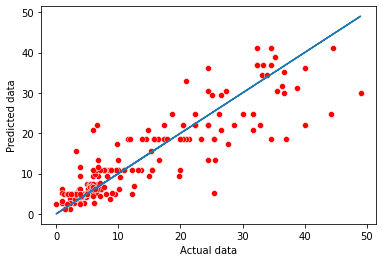

In [149]:
#DTC
sns.scatterplot(x=y_test,y=preddt,color='r')
plt.plot(y_test,y_test)
plt.xlabel('Actual data')
plt.ylabel('Predicted data')

Text(0, 0.5, 'Predicted data')

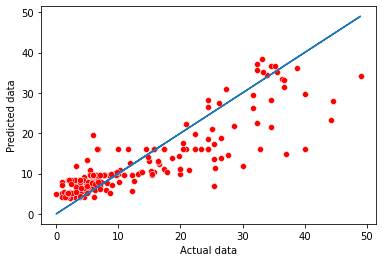

In [151]:
#Linear
sns.scatterplot(x=y_test,y=predrf,color='r')
plt.plot(y_test,y_test)
plt.xlabel('Actual data')
plt.ylabel('Predicted data')

The Decison tree model is the best model with R2 score of 78.87%

In [152]:
import pickle
filename="Capacity prediction.pkl"
pickle.dump(dt,open(filename, 'wb'))

Conclusion

In [154]:
model=pickle.load(open("Capacity prediction.pkl",'rb'))
result=model.score(x_test,y_test)
print('The R2 score of the model : ',result*100)

The R2 score of the model :  78.87632028791039
